<a href="https://colab.research.google.com/github/LunabaLeeris/Regression-Notebook/blob/main/LocallyWeightedLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM AS OF:** 30/06/2024

This Locally Weighted Linear Regression does not take into account that y intercept.

**SOLVED**: 30/06/2024

To take into account the y-intercept, we create additional dimension and filled it with ones. Our prediction for that dimension will then be 1

Locally weighted regression is only useful for instances where we know that linear regression is not enough but we don't want to think about what model to use. But it's major drawback is that we have to re-learn everytime we want to make a prediction.

This gives us a cost function
$$
J\theta = \sum_{i=0}^nw^{(i)}(y^{(i)} - \theta^Tx^{(i)})^2
$$
Here we will use the gaussian curve as our weighting function
$$
exp(\frac{-(x^{(i)} - x)^2}{2\sigma^2})
$$
Which leaves us with an update function
$$
\theta^{k + 1} = \theta^k - \alpha \sum_{i=0}^{n}w^{(i)}(h(x^{(i)}) - y^{(i)})x^{(i)}
$$
where x is the point we want to predict and $\sigma$ is how big our radius of interest (farther points from the radius is ignored)

**We can then translate it to matrices**
$$
\theta^{k + 1} = \theta^k - \alpha (TW^T)(T^T\theta - Y)
$$
Where (d = number of dimensions, m = number of training data)

$T \exists \mathbb{R}^{d \times m}$ = Training features

$\theta \exists \mathbb{R}^{d \times 1}$ =  Parameters

$Y \exists \mathbb{R}^{d \times 1}$ = Outputs

$W\exists \mathbb{R} ^{d \times m}$ = weight

Every cell value of $W$ can be denoted as

$$
W_{ij} = exp(-\frac{1}{2}(\frac{(T  - X^T)_{ij}}{\sigma})^2)
$$

Where $X\exists\mathbb{R}^{1\times d}$ are the features we want to predict





**Let's do a simple 2 Dimesional Regression for easier visualization**

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-4.1424603 ],
       [ 0.28737304]], dtype=float32)>


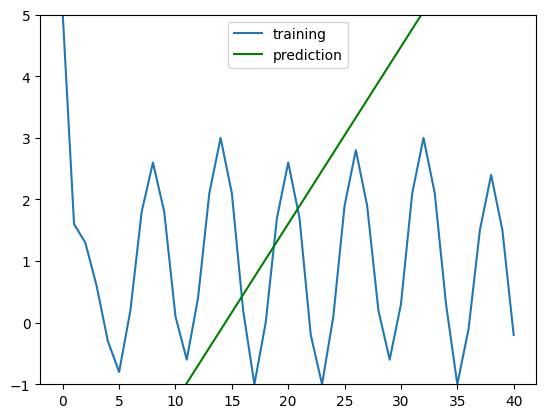

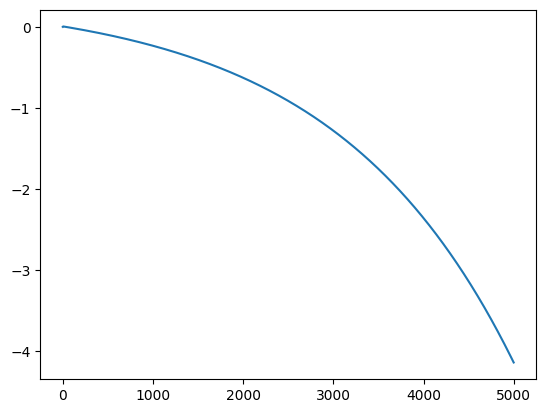

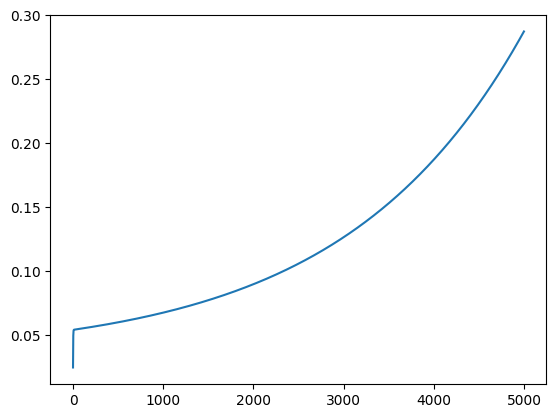

In [269]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Example of a data that is hard to predict using linear regression
T = tf.constant(
    [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
      1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # y intercept
     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
     18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
     34, 35, 36, 37, 38, 39, 40]], dtype=tf.float32)

Y = tf.constant(
    [[5], [1.6], [1.3], [0.6], [-0.3], [-0.8], [0.2], [1.8], [2.6], [1.8],
     [0.1], [-0.6], [0.4], [2.1], [3.0], [2.1], [0.2], [-1.0], [0.0], [1.7], [2.6],
     [1.7], [-0.2], [-1.0], [0.1], [1.9], [2.8], [1.9], [0.2], [-0.6], [0.3], [2.1],
     [3.0], [2.1], [0.3], [-1.0], [-0.1], [1.5], [2.4], [1.5], [-0.2]], dtype=tf.float32)

# Initialize THETA and W with appropriate shapes and zeros
THETA = tf.Variable([[0], [0]], dtype=tf.float32)
W = tf.Variable(tf.zeros((2, 41), dtype=tf.float32))

def predictUsingLocallyWeightedLR(sigma, alpha, X, iterations):
    THETA_HISTORY = []
    ITERATION = []

    for i in range(41):
        W[0, i].assign(tf.exp(-(T[0][i] - X[0])**2 / (2 * sigma**2)))
        W[1, i].assign(tf.exp(-(T[1][i] - X[1])**2 / (2 * sigma**2)))

    for i in tf.range(iterations):
        diff = tf.matmul(tf.transpose(T), THETA) - Y
        prod = tf.multiply(W, T)
        THETA.assign(THETA - alpha * tf.matmul(prod, diff))

        THETA_HISTORY.append(THETA.numpy())
        ITERATION.append(i)

    print(THETA)
    T_x = T.numpy()[1]
    Y_y = [y[0] for y in Y.numpy()]
    R_y = [r[0] for r in tf.matmul(tf.transpose(T), THETA).numpy()]

    plt.plot(T_x, Y_y, label="training")
    plt.plot(T_x, R_y, color="green", label="prediction")
    plt.ylim(-1, 5)

    plt.legend()
    plt.show()

    plt.plot(ITERATION, [th[0] for th in THETA_HISTORY], label="Theta movement 0")
    plt.show()

    plt.plot(ITERATION, [th[1] for th in THETA_HISTORY], label="Theta movement 1")
    plt.show()

sigma = 7
alpha = 0.0001
X = tf.constant([[1], [14.5]], dtype=tf.float32)
iterations = 5000

# Run the function
predictUsingLocallyWeightedLR(sigma, alpha, X, iterations)